In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [115]:
# Importar el dataset
data_penguins = sns.load_dataset('penguins')
data_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Ajustar un modelo de regresión lineal simple que permita predecir la masa corporal de un pingüino de esta región en función de la longitud de su aleta.

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

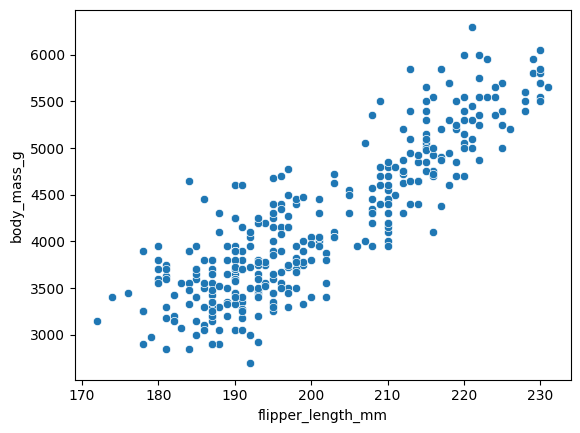

In [116]:
sns.scatterplot(data=data_penguins, y='body_mass_g', x='flipper_length_mm')
# body mass es la variable a predecir (dependiente) y flipper length es la predictora (independiente)

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

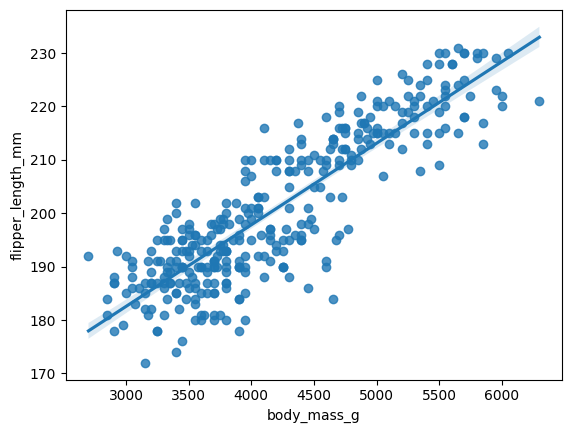

In [117]:
sns.regplot(data=data_penguins, x='body_mass_g', y='flipper_length_mm')

In [118]:
# Ajustamos el modelo
modelo1 = smf.ols(formula = 'body_mass_g ~ flipper_length_mm', data=data_penguins).fit()
print(modelo1.summary())
#print(modelo1.summary2())


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1071.
Date:              jue., 26 jun. 2025   Prob (F-statistic):          4.37e-107
Time:                        19:51:23   Log-Likelihood:                -2528.4
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     340   BIC:                             5069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5780.8314    305.81


### Utilizar el modelo ajustado para predecir la masa corporal de un pingüino con una longitud de aleta de 207 mm.

$x =$ flipper_length_mm

Ecuación de la recta:

$\hat{y} = -5780.8314 + 49.6856x$

In [119]:
# PREDICCIÓN de la masa corporal para un pingüino de 207 mm de aleta
prediccion207 = -5780.8314 + 49.6856 * 207
print(f'Un pingüino con una aleta de 207mm tendrá aproximadamente {prediccion207:.2f} gramos de masa corporal')


Un pingüino con una aleta de 207mm tendrá aproximadamente 4504.09 gramos de masa corporal



### Utilizar el modelo ajustado para predecir la masa corporal de un pingüino **hembra** con una longitud de aleta de 207 mm.

En realidad la información de hembra no influye en el proceso de nuestro modelo porque no toma esas variables para predecir la masa corporal en gramos.

La única información explicativa que utiliza nuestro modelo es la **LONGITUD DE LA ALETA**

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

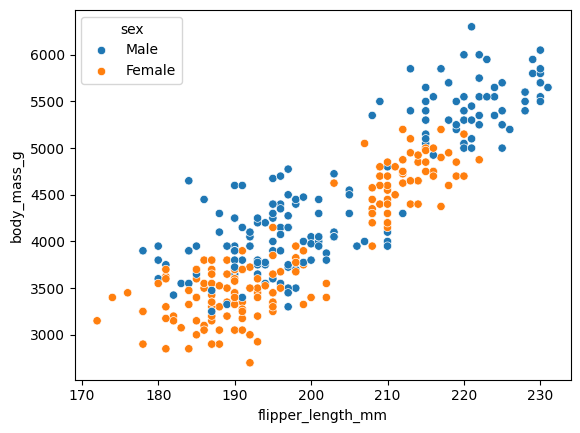

In [120]:
# Observemos la distinción entre sexo
sns.scatterplot(data=data_penguins, y='body_mass_g', x='flipper_length_mm', hue='sex')
# body mass es la variable a predecir (dependiente) y flipper length es la predictora (independiente)

Cómo hacemos para meter en el modelo de regresión lineal variables categóricas?
one hot encoding
variables dummies
son como variables ficticias creadas artificialmente para poder incluirlas en el modelo.
Cuántos niveles tiene la variable?
macho y hembra. solo dos
vamos a crear una variable x2 que va a asumir dos valores: 1 si es macho y 0 si es hembra

In [121]:
# Incorporamos una variable cualitativa al modelo
# Tenemos que tener cuidado con los faltantes. Tener faltantes en una variable cualitativa sí puede traer problemas.
# Eliminamos faltantes en la columna sex
data_penguins_sin_nan = data_penguins.dropna(subset='sex').copy()


In [122]:
# Forma artesanal de generar variables dummies 
data_penguins_sin_nan['male_dummy'] = data_penguins_sin_nan['sex'].apply(lambda x : 1 if x == 'Male' else 0)

In [125]:
# Usando método get_dummies() de pandas
data_penguins_sin_nan['sexo'] = data_penguins_sin_nan['sex']
data_penguins_sin_nan = pd.get_dummies(data_penguins_sin_nan, columns=['sexo'], dtype=int, drop_first=False).copy()

In [ ]:
# No tenemos que poner todas las dummies. siempre tiene que ser una menos.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,male_dummy,sexo_Female,sexo_Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,0,1
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,0,1,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0,1,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1,0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,0,1,0


In [139]:
modelo2 = smf.ols(data=data_penguins_sin_nan, formula='body_mass_g ~  flipper_length_mm+ sex').fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:              jue., 26 jun. 2025   Prob (F-statistic):          3.53e-118
Time:                        20:01:10   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.79

Entonces, la ecuación de la recta que nos queda es:

$x_1$ = flipper_length (mm)
$x_2$ = sexo (1 si es macho, 0 si es hembra)

$\hat{y} = -5410.3002 + 46.9822x_1 + 347.8503x_2 $

In [141]:
# Ahora sí tenemos un modelo que incluye el sexo como variable de predicción
pinguino_hembra = -5410.3002 + 46.9822 *207 + 347.8503 * 0 
print(pinguino_hembra)

4315.0152


In [143]:
# Y si lo quisiera hacer para un PINGÜINO MACHO tengo que multiplicar por 1 la dummy de sex
pingüino_macho = -5410.3002 + 46.9822 *207 + 347.8503 * 1 
print(pingüino_macho)

4662.8655


In [153]:
# Método para no tener que hacer la cuenta a mano: PREDICT

df_prediccion = pd.DataFrame({'sex' : ['Female', 'Male'],
                              'flipper_length_mm' : [207, 207]})
print(df_prediccion)


      sex  flipper_length_mm
0  Female                207
1    Male                207


In [154]:
modelo2.predict(df_prediccion)

0    4315.010052
1    4662.860306
dtype: float64

In [ ]:
# Acá vemos el dataframe ordenado por la variable largo de aleta para evaluar si coincide la predicción (de chusma nada más)
data_penguins.sort_values('flipper_length_mm', ascending=True)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
28,Adelie,Biscoe,37.9,18.6,172.0,3150.0,Female
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,Female
122,Adelie,Torgersen,40.2,17.0,176.0,3450.0,Female
31,Adelie,Dream,37.2,18.1,178.0,3900.0,Male
30,Adelie,Dream,39.5,16.7,178.0,3250.0,Female
...,...,...,...,...,...,...,...
285,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,Male
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,Male
283,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,Male
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


## $R^2$

Cuántas más variables ponga en el modelo $R^2$ tiende a aumentar, lo que en general es algo querido. Bueno, en realidad esto no es tan así. <br>
Estaríamos haciendo un overfitting. Es decir ajusta demasiado bien a los datos que tenemos pero esto no se correspondería con valores del mundo real. <br>
NO ESTÁ BUENO QUE LOS MODELOS TENGAN UN $R^2$ TAN ALTO <br>
Ahora vamos a evaluar qué modelo predice mejor. <br>
Pero en nuestro caso, modelo1 y modelo2 no tienen la misma cantidad de variables, modelo2 tiene una más, por lo tanto su $R^2$ deja de ser una buena medida porque aumentaría simplemente porque tiene una variable más que modelo1. <br>
Para esto existe una variable ligera que se llama $R^2 AJUSTADO$. <br>
Este penaliza la inclusión innecesaria de variables que solo generan ruido en el modelo. <br>
$R^2$ ajustado penaliza que metamos variables innecesarias. <br>
$R^2$ ajustado sirve para comparar modelos con distinta cantidad de variables. <br>

Cuando tenemos que comparar modelos SIEMPRE tenemos que usar $R^2_{adj}$

Ahora, vamos a ver qué pasa con nuestro modelos:

###### modelo1:
$R^2_{adj} = 0.758$
###### modelo2:
$R^2_{adj} = 0.805$

Por lo tanto, podemos confirmar, viendo el $R^2_{adj}$ que el modelo2 es realmente mejor

Ajustamos modelos de regresión lineal, dijimos que los ajustamos porque nos interesa hacer predicciones. Si tengo un una propiedad con estos tamaños, uso un modelo para predecir su precio.
Es una caja negra, no nos interesa tanto lo que hace por dentro. Lo que nos interesa es que prediga bien. No importa las operaciones que haga por dentro
#### INFERENCIA
Más que buscar modelos para predecir vamos a estar enfocados en ver cuánto afectan las variables a los modelos. Aportan algo? o no?
Es un analisis sobre el modelo, ver cuál es la estructura del modelo.
Ver el vínculo que las variables tienen con esa predicción.
La inferencia nos sirve para la selección de las variables. Para saber qué variables realmente nos aporten algo para la predicción.

#### TEST DE HIPÓTESIS

Procedimientos estadísticos que nos ayudan a tomar decisiones.


